<a href="https://colab.research.google.com/github/uzeziogho/Private-Projects/blob/main/CreditRisk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade pip

# Importing NumPy
import numpy as np

# Importing Pandas
import pandas as pd

# Importing Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Importing PyTorch
import torch

# Importing Keras
import keras
from scipy import stats

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn import metrics


import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Reading the data into a pandas dataframe
CC_df=pd.read_csv('/content/credit_risk_dataset.csv')

# View summary statistics of the dataframe
CC_df.describe()

# View the first five rows of each column
CC_df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
person_age                     

<ipython-input-19-86181dde3057>:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  CC_df[col].fillna(CC_df[col].median(), inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE o

Class distribution after SMOTE:
loan_status
0    20401
1    20401
Name: count, dtype: int64


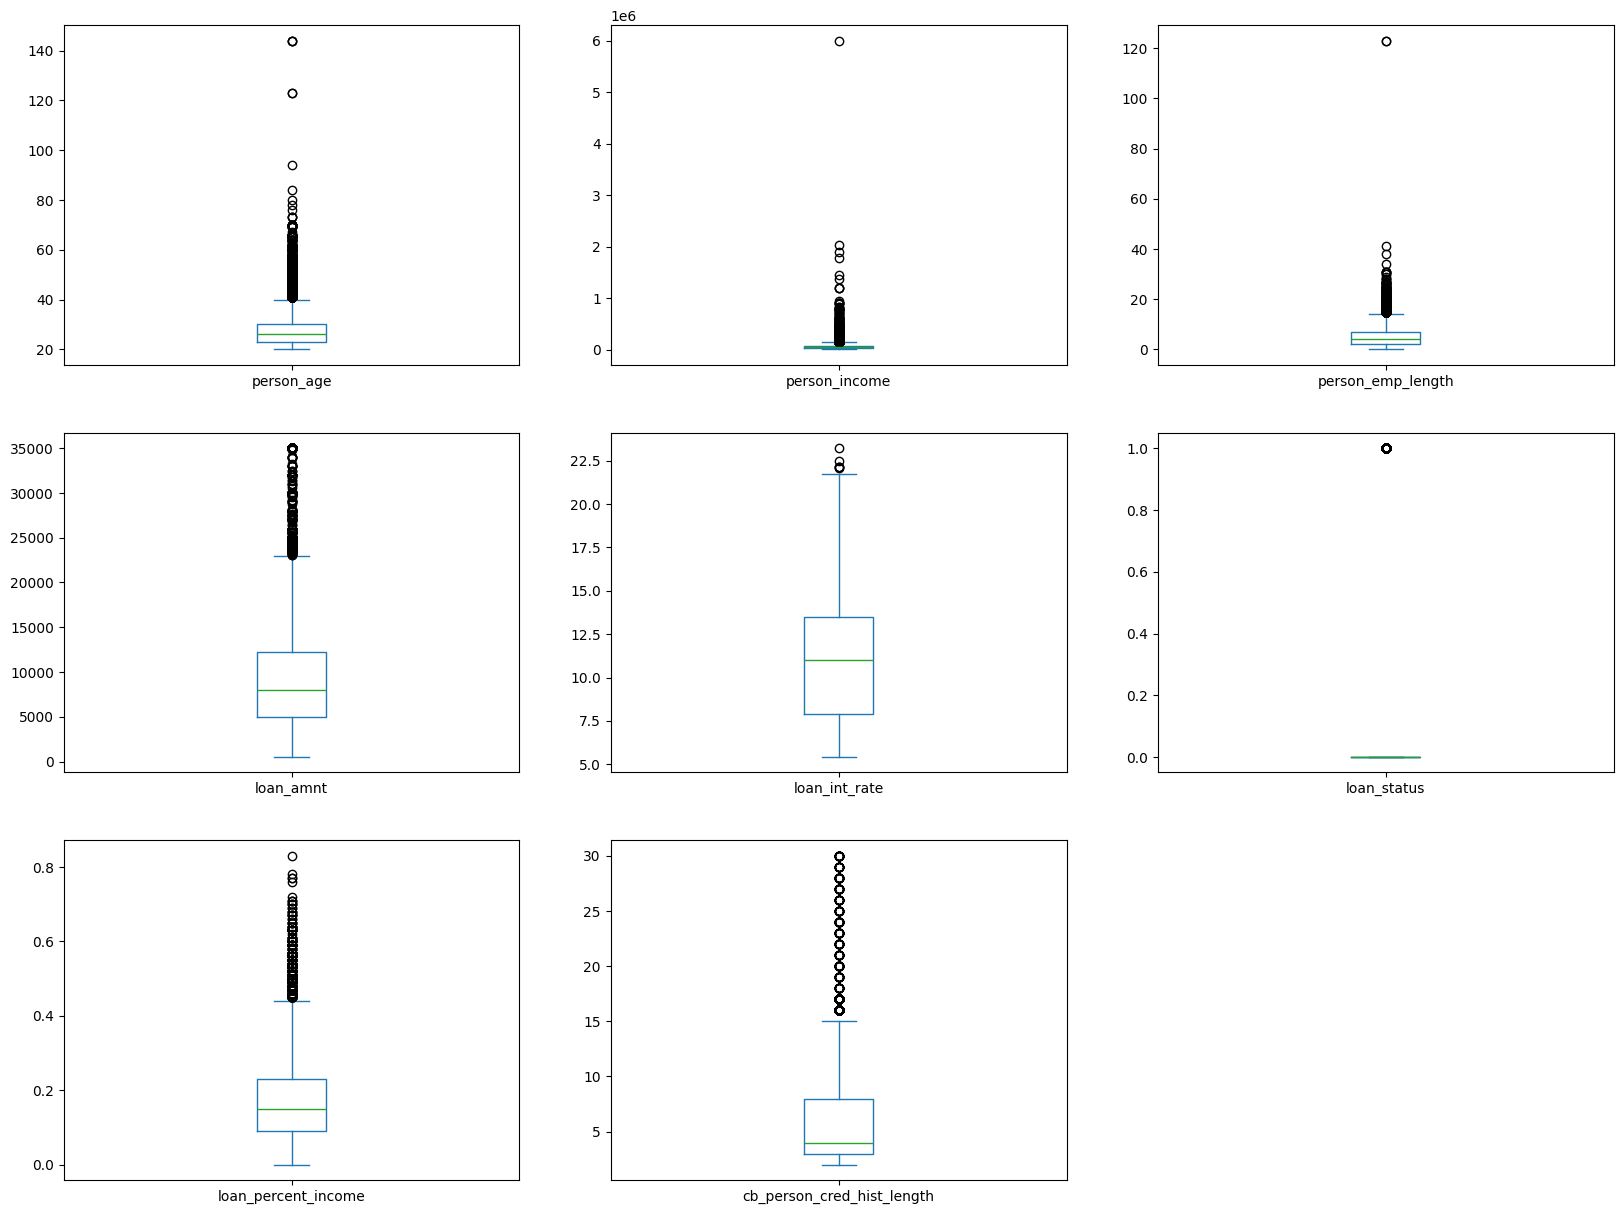

XGBoost Accuracy: 0.934632499616388
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5072
           1       0.97      0.73      0.83      1445

    accuracy                           0.93      6517
   macro avg       0.95      0.86      0.90      6517
weighted avg       0.94      0.93      0.93      6517

XGBoost Confusion Matrix:
[[5038   34]
 [ 392 1053]]


In [19]:
# prompt: xgboost with smote oversampling

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import keras
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
!pip install --upgrade pip

# Importing NumPy

# Importing Pandas

# Importing Scikit-learn

# Importing PyTorch

# Importing Keras



#Reading the data into a pandas dataframe
CC_df=pd.read_csv('/content/credit_risk_dataset.csv')

# View the first five rows of each column
CC_df.head(5)

# Calculate the number of zeros in each column
num_zeros = (CC_df == 0).sum()

# Print the number of zeros in each column
print(num_zeros)
CC_df['loan_status'].value_counts()
# Data preprocessing (handling missing values, encoding categorical features, etc.)
# Example: One-hot encode 'person_home_ownership'
CC_df = pd.get_dummies(CC_df, columns=['person_home_ownership'])

# Example: One-hot encode 'loan_intent'
CC_df = pd.get_dummies(CC_df, columns=['loan_intent'])

# Example: One-hot encode 'loan_grade'
CC_df = pd.get_dummies(CC_df, columns=['loan_grade'])

# Example: One-hot encode 'cb_person_default_on_file'
CC_df = pd.get_dummies(CC_df, columns=['cb_person_default_on_file'])

# Example: Fill missing numerical values with the median
numerical_cols = CC_df.select_dtypes(include=np.number).columns
for col in numerical_cols:
  CC_df[col].fillna(CC_df[col].median(), inplace=True)

# Separate features (X) and target (y)
X = CC_df.drop('loan_status', axis=1)
y = CC_df['loan_status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# Visualize the class distribution after SMOTE
sns.countplot(x=y_train_smote)
plt.title('Loan Status Distribution After SMOTE')
plt.show()

# Now you can use X_train_smote and y_train_smote to train your model
xgb= XGBClassifier(n_estimators=50, random_state=0)
xgb.fit(X_train_smote, y_train_smote)

# Make predictions on the test set using the XGBoost model
y_pred_xgb = xgb.predict(X_test)

# Calculate the accuracy of the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")

# Print classification report for XGBoost
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

# Print confusion matrix for XGBoost
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
person_age                     

<ipython-input-26-e8497e3e6946>:66: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  CC_df[col].fillna(CC_df[col].median(), inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE o

Class distribution after SMOTE:
loan_status
0    20401
1    20401
Name: count, dtype: int64


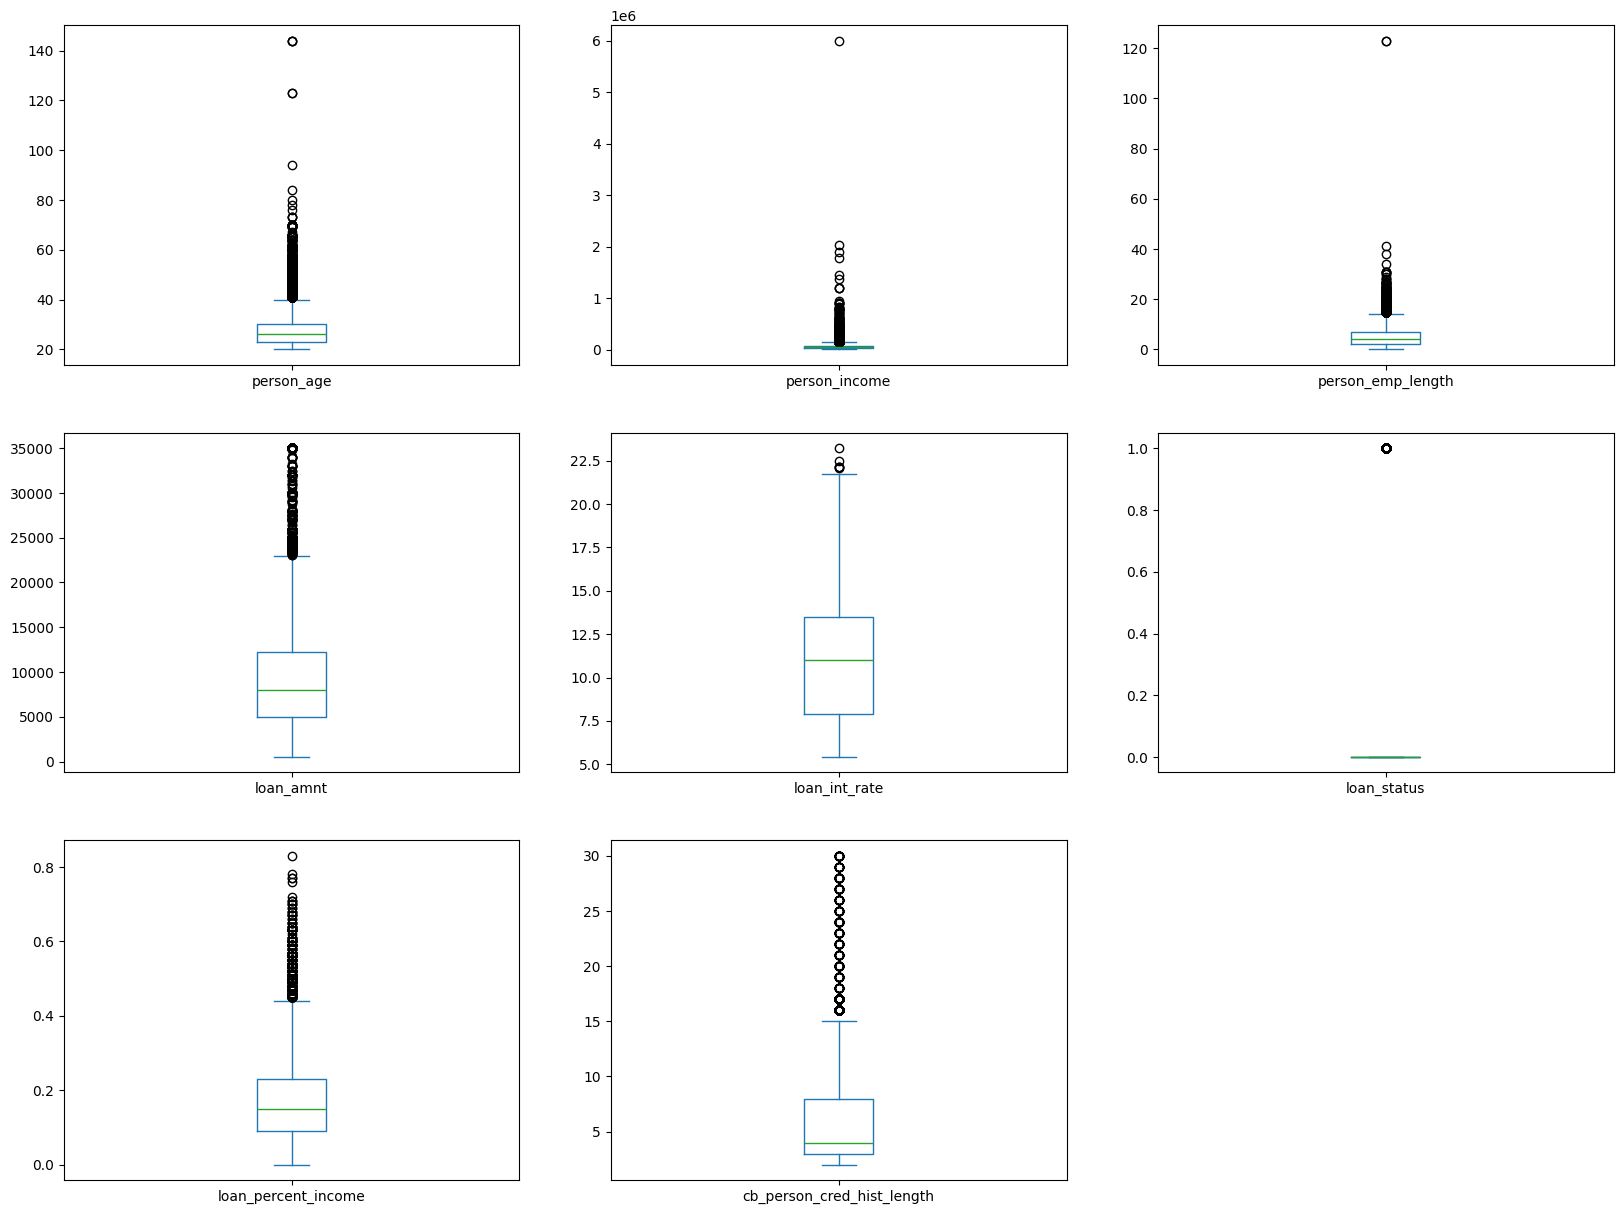

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1021/1021 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8533 - loss: 0.3568 - val_accuracy: 0.9768 - val_loss: 0.0488
Epoch 2/50
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9160 - loss: 0.2363 - val_accuracy: 0.9827 - val_loss: 0.0328
Epoch 3/50
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9174 - loss: 0.2277 - val_accuracy: 0.9859 - val_loss: 0.0278
Epoch 4/50
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9217 - loss: 0.2180 - val_accuracy: 0.9911 - val_loss: 0.0198
Epoch 5/50
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9254 - loss: 0.2121 - val_accuracy: 0.9914 - val_loss: 0.0183
Epoch 6/50
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9270 - loss: 0.2082 - val_accuracy: 0.9912 - val_loss: 0.0192
Epoch 7/50
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9318 - loss: 0.1968 - val_accuracy: 0.9922 - val_loss: 0.0172
Epoch 8/50
1021/1021 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9296 - loss: 0.2019 - val_accurac

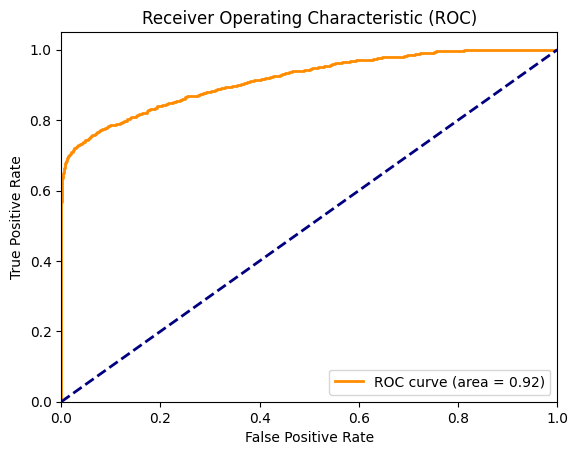

In [26]:
# prompt: generate tensorflow with smote oversampling and  roc curve

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
import keras
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
!pip install --upgrade pip
!pip install tensorflow

# Importing TensorFlow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#Reading the data into a pandas dataframe
CC_df=pd.read_csv('/content/credit_risk_dataset.csv')

# View information about the dataframe
CC_df.info()

# View summary statistics of the dataframe
CC_df.describe()

# View the first five rows of each column
CC_df.head(5)

#Box and Whisker plot to visualize the distribution of all atributes for outliers
CC_df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,15))
# Calculate the number of zeros in each column
num_zeros = (CC_df == 0).sum()

# Print the number of zeros in each column
print(num_zeros)
CC_df['loan_status'].value_counts()
# Data preprocessing (handling missing values, encoding categorical features, etc.)
# Example: One-hot encode 'person_home_ownership'
CC_df = pd.get_dummies(CC_df, columns=['person_home_ownership'])

# Example: One-hot encode 'loan_intent'
CC_df = pd.get_dummies(CC_df, columns=['loan_intent'])

# Example: One-hot encode 'loan_grade'
CC_df = pd.get_dummies(CC_df, columns=['loan_grade'])

# Example: One-hot encode 'cb_person_default_on_file'
CC_df = pd.get_dummies(CC_df, columns=['cb_person_default_on_file'])

# Example: Fill missing numerical values with the median
numerical_cols = CC_df.select_dtypes(include=np.number).columns
for col in numerical_cols:
  CC_df[col].fillna(CC_df[col].median(), inplace=True)

# Separate features (X) and target (y)
X = CC_df.drop('loan_status', axis=1)
y = CC_df['loan_status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# Visualize the class distribution after SMOTE
sns.countplot(x=y_train_smote)
plt.title('Loan Status Distribution After SMOTE')
plt.show()

# Scale numerical features
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

# Build the TensorFlow model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_smote.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_smote, y_train_smote, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

# Make predictions
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification Report and Confusion Matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 55.9 MB/s eta 0:00:00


<ipython-input-28-83eda7b255a0>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  CC_df[col].fillna(CC_df[col].median(), inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE o

Class distribution after SMOTE:
loan_status
0    20401
1    20401
Name: count, dtype: int64


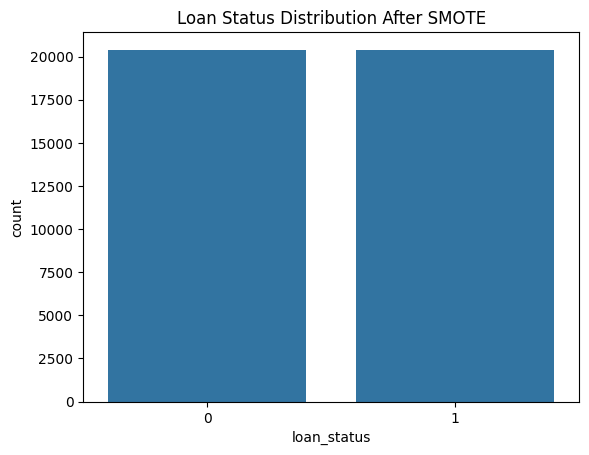

CatBoost Accuracy: 0.9327911615774129
CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5072
           1       0.95      0.73      0.83      1445

    accuracy                           0.93      6517
   macro avg       0.94      0.86      0.89      6517
weighted avg       0.93      0.93      0.93      6517

CatBoost Confusion Matrix:
[[5019   53]
 [ 385 1060]]


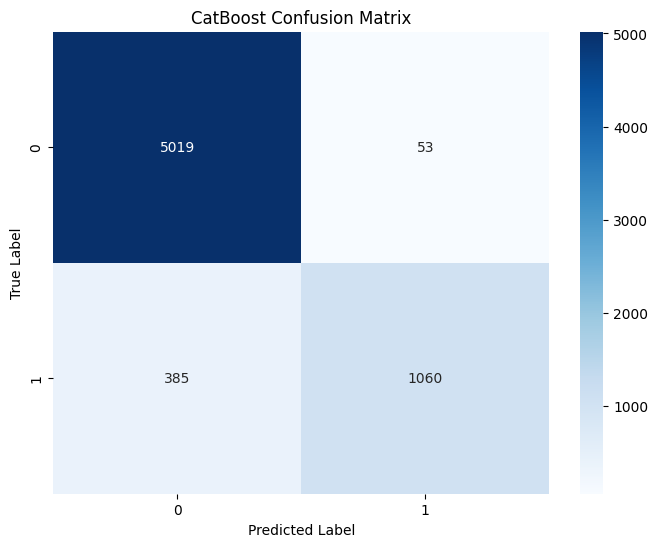

In [28]:
# prompt: generate catboost with smote oversampling and confusion matrix

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
!pip install catboost

from catboost import CatBoostClassifier

# Install catboost if not already installed
!pip install catboost

# Reading the data into a pandas dataframe
CC_df = pd.read_csv('/content/credit_risk_dataset.csv')

# Data preprocessing
CC_df = pd.get_dummies(CC_df, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'])
numerical_cols = CC_df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    CC_df[col].fillna(CC_df[col].median(), inplace=True)

# Separate features (X) and target (y)
X = CC_df.drop('loan_status', axis=1)
y = CC_df['loan_status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# Visualize the class distribution after SMOTE
sns.countplot(x=y_train_smote)
plt.title('Loan Status Distribution After SMOTE')
plt.show()

# Initialize and train CatBoostClassifier
cat_model = CatBoostClassifier(iterations=100, random_state=42, verbose=False) # Set verbose to False to avoid large output
cat_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred_cat = cat_model.predict(X_test)

# Evaluate the model
accuracy_cat = accuracy_score(y_test, y_pred_cat)
print(f"CatBoost Accuracy: {accuracy_cat}")

# Classification Report and Confusion Matrix
print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred_cat))
print("CatBoost Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred_cat)
print(conf_matrix)

# Plot Confusion Matrix as Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('CatBoost Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()